In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants, interpolate
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks, savgol_filter
import glob
import os


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
all_files_cv = os.listdir('C:/Users/MiAir/Desktop/Измерения/GaN/Sample 2/Measurments 23.03/CVF 23.03/')  
print(all_files_cv)

['K100100.TXT', 'K100200.TXT', 'K100300.TXT', 'K10050.TXT', 'K10100.TXT', 'K10200.TXT', 'K10300.TXT', 'K1050.TXT', 'K1100.TXT', 'K1200.TXT', 'K1300.TXT', 'K150.TXT', 'M1100.TXT', 'M1200.TXT', 'M1300.TXT', 'M150.TXT']


In [4]:
all_files_vac = os.listdir('C:/Users/MiAir/Desktop/Измерения/GaN/Sample 2/Measurments 23.03/VAC 23.03/')  
print(all_files_vac)

['[2]VAC[1].txt', '[2]VAC[2].txt', '[2]VAC[3].txt', '[2]VAC[4].txt', '[2]VAC[5].txt', '[2]VAC[6].txt', '[2]VAC[7].txt', '[2]VAC[8].txt']


In [5]:
def read_cap(file):
    data = pd.read_csv(file, sep='\t',skiprows=([i for i in range(0, 20)] +
                                                [j for j in range(422, 829)]), usecols=['Bias', 'Data Trace Real'])
    data['1_over_C2'] = data['Data Trace Real'].apply(lambda x: 1/x**2)
    return data.rename(columns={'Data Trace Real': 'Capacity'})
    
    
def read_cond(file):
    data = pd.read_csv(file, sep='\t',skiprows=427, usecols=['Bias', 'Data Trace Real'])
    return data.rename(columns={'Data Trace Real': 'Conductivity'})

In [6]:
cap_100K50 = read_cond('K10050.TXT')
cap_10K50 = read_cond('K1050.TXT') 
cap_1K50 = read_cond('K150.TXT')
cap_1M50 = read_cond('M150.TXT') 

cap_100K100 = read_cond('K100100.TXT')
cap_10K100 = read_cond('K10100.TXT') 
cap_1K100 = read_cond('K1100.TXT')
cap_1M100 = read_cond('M1100.TXT') 

cap_100K200 = read_cond('K100200.TXT')
cap_10K200 = read_cond('K10200.TXT') 
cap_1K200 = read_cond('K1200.TXT')
cap_1M200 = read_cond('M1200.TXT') 

cap_100K300 = read_cond('K100300.TXT')
cap_10K300 = read_cond('K10300.TXT') 
cap_1K300 = read_cond('K1300.TXT')
cap_1M300 = read_cond('M1300.TXT') 

In [7]:
cap_100K50 = read_cap('K10050.TXT')
cap_10K50 = read_cap('K1050.TXT') 
cap_1K50 = read_cap('K150.TXT')
cap_1M50 = read_cap('M150.TXT') 

cap_100K100 = read_cap('K100100.TXT')
cap_10K100 = read_cap('K10100.TXT') 
cap_1K100 = read_cap('K1100.TXT')
cap_1M100 = read_cap('M1100.TXT') 

cap_100K200 = read_cap('K100200.TXT')
cap_10K200 = read_cap('K10200.TXT') 
cap_1K200 = read_cap('K1200.TXT')
cap_1M200 = read_cap('M1200.TXT') 

cap_100K300 = read_cap('K100300.TXT')
cap_10K300 = read_cap('K10300.TXT') 
cap_1K300 = read_cap('K1300.TXT')
cap_1M300 = read_cap('M1300.TXT') 

In [8]:
def cv_plot(list):
    i = 0
    fig, axs = plt.subplots(len(list), 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(18,18))
    for item in list:
        axs[i, 0].scatter(x=item['Bias'], y=item['Capacity'])
        axs[i, 0].set_title('Вольт-фарадная характеристика')
        axs[i, 0].set(xlabel = 'Bias, V',ylabel ='Capacity, f' )

        axs[i, 1].scatter(x=item['Bias'], y=item['1_over_C2'])
        axs[i, 1].set_title('1/C^2(V)')
        axs[i, 1].set(xlabel = 'Bias, V',ylabel ='1/C^2' )
        
        axs[i, 0].grid()
        axs[i, 1].grid()
        i+=1

# plt.savefig('C-V_char.png')
    

In [67]:
def VAC_plot(data, V1, V2, t):
    fig, axs = plt.subplots(1, 2, gridspec_kw={'hspace': 0.25, 'wspace': 0.3}, figsize=(15,6))
    
    plt.subplot(121)
    plt.plot(data['Volt'],data['Amp'])
    plt.title(' Вольт-амперная характеристика. T={} K'.format(t))
    plt.xlabel('U, V',fontsize='x-large')
    plt.ylabel('I, A',fontsize='x-large')
    plt.grid()
    plt.yscale('log')

    plt.subplot(122)
    plt.plot(data['Volt'].loc[(data['Volt']>V1)&(data['Volt']<V2)],
             np.log(data['Amp'].loc[(data['Volt']>V1)&(data['Volt']<V2)]))
    plt.title('Линейный участок кривой')
    plt.xlabel('U, V',fontsize='x-large')
    plt.ylabel('I, A',fontsize='x-large')
    coefficients = np.polyfit(data['Volt'].loc[(data['Volt']>V1)&(data['Volt']<V2)],
                              np.log(data['Amp'].loc[(data['Volt']>V1)&(data['Volt']<V2)]), deg=1)
    poly = np.poly1d(coefficients)
    lin_fit = poly(data['Volt'].loc[(data['Volt']>V1)&(data['Volt']<V2)])
    plt.plot(data['Volt'].loc[(data['Volt']>V1)&(data['Volt']<V2)], lin_fit, color='red')
        
    plt.grid()
    print('Уравненение апроксимационной прямой при T={} K'.format(t), poly)
    print('Рассчитанные параметры:')
    print('I_0 = ', f'{np.exp(poly[0]):.2e}', 'A')
    print('R = ',  poly[1].round(2), 'Ohm')
    print('phi_b = ', (poly[0]/poly[1]).round(2), 'V')

In [11]:
VAC_300 = (pd.read_csv('[2]VAC[2].txt', sep='\t'))
VAC_200 = (pd.read_csv('[2]VAC[4].txt', sep='\t'))
VAC_100 = (pd.read_csv('[2]VAC[5].txt', sep='\t'))
VAC_50 = (pd.read_csv('[2]VAC[6].txt', sep='\t'))

VAC_300 = VAC_300.replace(',', '.', regex=True).drop(columns=['N'], axis=1)
VAC_200 = VAC_200.replace(',', '.', regex=True).drop(columns=['N'], axis=1)
VAC_100 = VAC_100.replace(',', '.', regex=True).drop(columns=['N'], axis=1)
VAC_50 = VAC_50.replace(',', '.', regex=True).drop(columns=['N'], axis=1)

In [15]:
list_VAC = [VAC_300, VAC_200, VAC_100, VAC_50]

In [16]:
for name in list_VAC:
    name.Volt = pd.to_numeric(name.Volt)
    name.Amp = pd.to_numeric(name.Amp).abs()

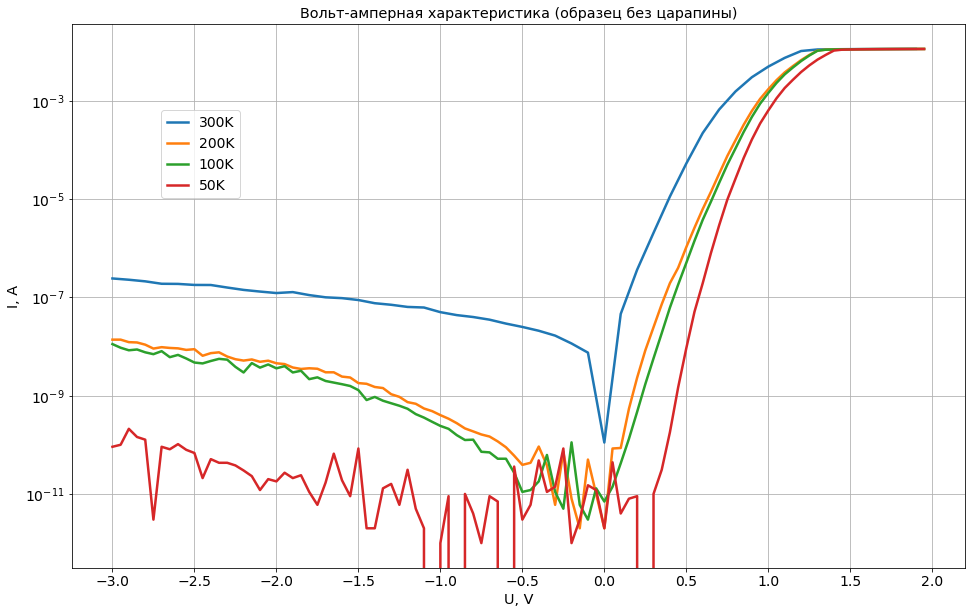

In [20]:
fig, axs = plt.subplots(figsize=(16,10))

axs.xaxis.set_major_locator(MultipleLocator(0.5))
for nm in list_VAC:
    axs = plt.plot(nm['Volt'].loc[nm['Volt']<2], nm['Amp'].loc[nm['Volt']<2],linewidth=2.5)

plt.yscale('log')

plt.title('Вольт-амперная характеристика (образец без царапины)', fontsize='x-large')
plt.legend(('300K', '200K','100K', '50K'), loc=(0.1, 0.68), handlelength=1.5, fontsize=14)
plt.xlabel('U, V',fontsize='x-large')
plt.ylabel('I, A',fontsize='x-large')

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.grid()
# plt.savefig('VAC_all_Temps.png')

In [25]:
temps = [300,200,100,50]

Уравненение апроксимационной прямой при T=300 K  
16.85 x - 18.32
Рассчитанные параметры:
I_0 =  1.11e-08 A
R =  16.85 Ohm
phi_b =  -1.09 V


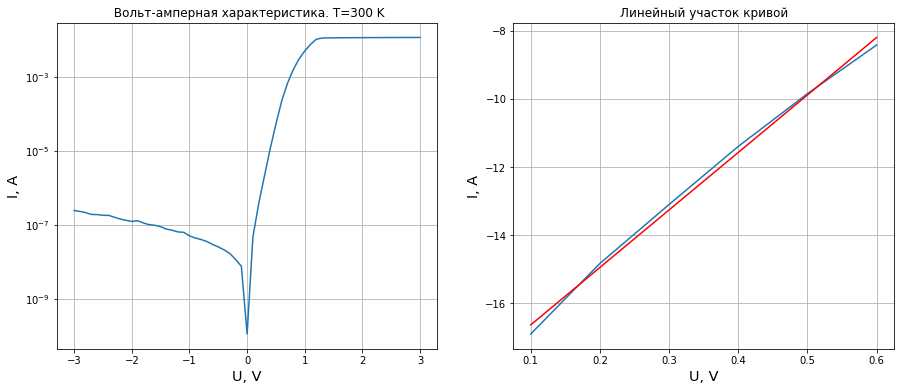

In [68]:
VAC_plot(VAC_300, 0,0.65, 300)   

Уравненение апроксимационной прямой при T=200 K  
22.03 x - 24.19
Рассчитанные параметры:
I_0 =  3.12e-11 A
R =  22.03 Ohm
phi_b =  -1.1 V


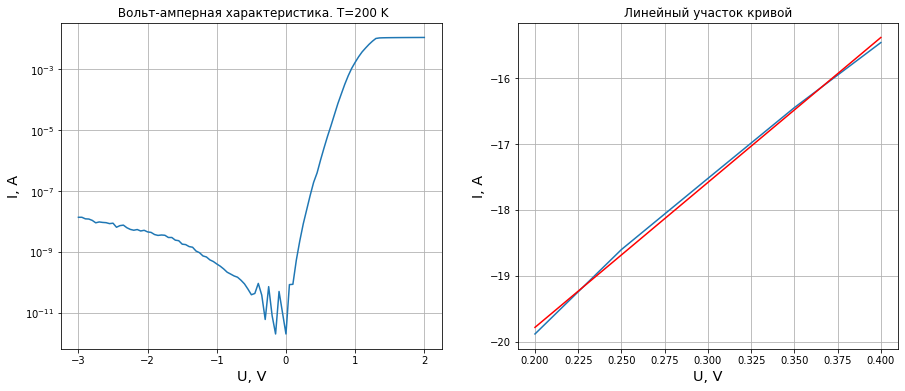

In [72]:
VAC_plot(VAC_200, 0.15,0.45, 200)   

Уравненение апроксимационной прямой при T=100 K  
24.18 x - 26.3
Рассчитанные параметры:
I_0 =  3.78e-12 A
R =  24.18 Ohm
phi_b =  -1.09 V


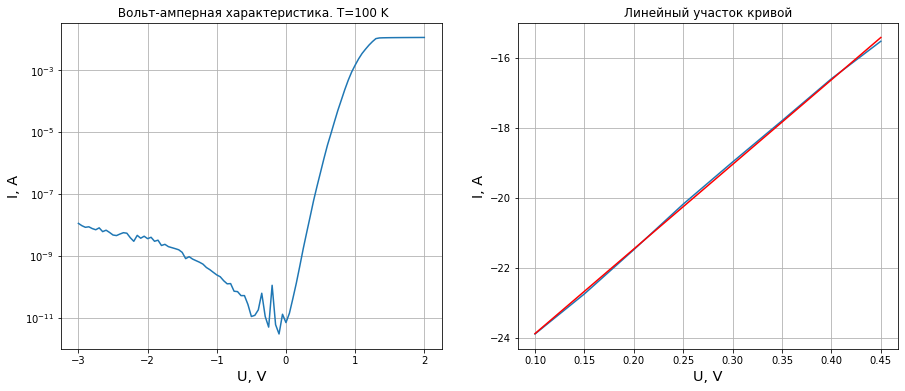

In [74]:
VAC_plot(VAC_100, 0.05,0.5, 100)   

Уравненение апроксимационной прямой при T=50 K  
29.02 x - 33.05
Рассчитанные параметры:
I_0 =  4.44e-15 A
R =  29.02 Ohm
phi_b =  -1.14 V


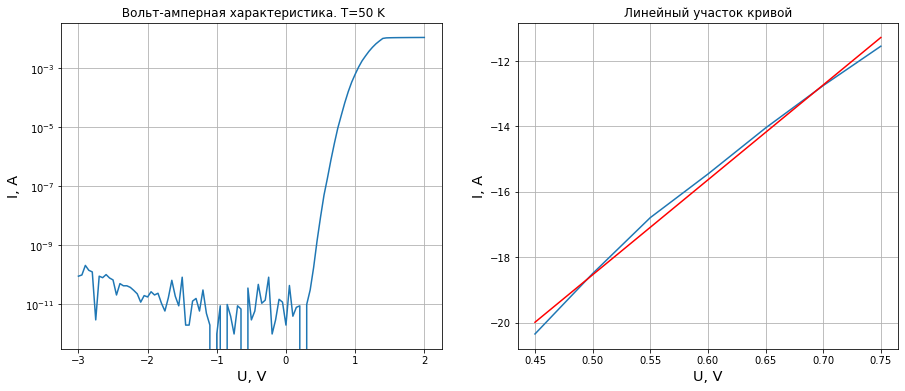

In [81]:
VAC_plot(VAC_50, 0.4,0.8, 50)   